# Lista 3
### NCG-040 - Introdução à Visão Computacional

**Instruções:**

 1. Comentários nos códigos desenvolvidos.
 1. Caso exista uma pergunta, deve ser respondida como comentários no arquivo ou em uma nova célula de texto.
 1. Digitar seu nome e DRE abaixo.
 1. Ao finalizarem a lista, renomeie ou salve uma cópia do arquivo no formato NomeSobrenome_ListaX.ipynb
 1. Enviar via Dropbox até 25/06/2025 - https://www.dropbox.com/request/Duz3Wq2nsdIYQVp7PVvH

`Nome: Diego Vasconcelos Schardosim de Matos`

`DRE: 120098723`

### 0) Instruções

Para esta lista, vamos fazer algo um pouco diferente. Vocês estão livres para escolher um dataset simples e fazer um treinamento de rede neural, conforme visto nas aulas do dia 22 e 29 de maio. No mínimo uma tarefa de classificação binária.

Dica: Cats vs Dogs do Kaggle ou similar

O dataset escolhido foi [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data). Este dataset contem um conjunto de features relacionados ao comportamento social de indivíduos categorizados em *Introvertido* ou *Extrovertido*.

O modelo de rede neural usado tem potencial aplicação nas áreas de psicologia, sociologia e marketing.

Seu dataset é dividido em:

- Time_spent_Alone: Horas gastas sozinho diariamente (0–11).
- Stage_fear: Presença de medo de palco (Sim/Não).
- Social_event_attendance: Frequência de eventos sociais (0–10).
- Going_outside: Frequência de saídas de casa (0–7).
- Drained_after_socializing: Sentimento de esgotamento após socializar (Sim/Não).
- Friends_circle_size: Número de amigos próximos (0–15).
- Post_frequency: Frequência de postagens em redes sociais (0–10).
- Personality: Variável-alvo (Extrovertido/Introvertido).*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
# Contagem de colunas com valores nulos
df.isna().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


Praticamente todas as colunas possuem valores nulos

In [4]:
df.shape

(2900, 8)

Como eu gostaria de visualizar um pouco a distribuição dos dados, aceitei as sugestões da IA do google colab.

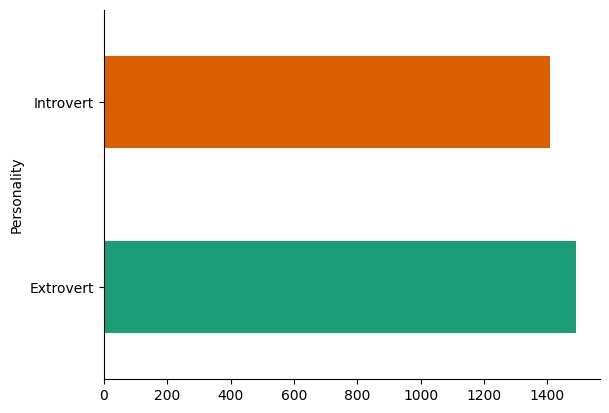

In [5]:
# @title Personality

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

As classes estão bem distribuídas

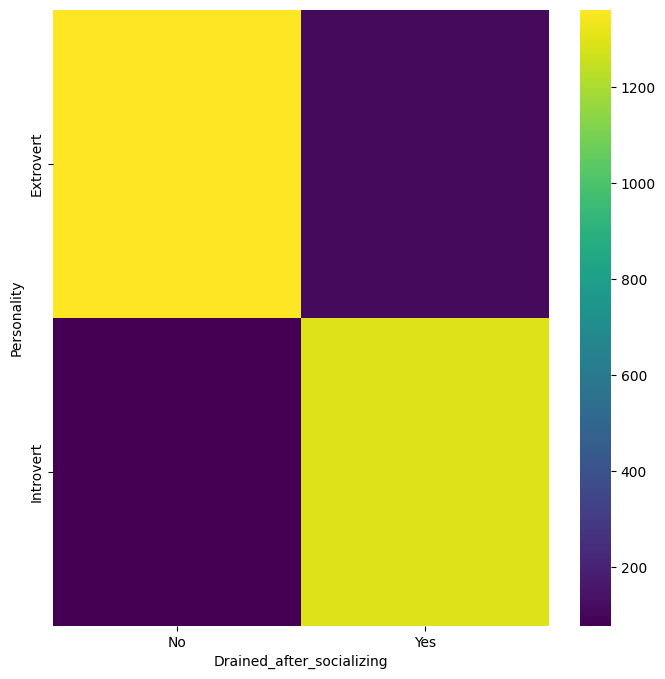

In [6]:
# @title Drained_after_socializing vs Personality

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Personality'].value_counts()
    for x_label, grp in df.groupby('Drained_after_socializing')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Drained_after_socializing')
_ = plt.ylabel('Personality')

Aparenta ter forte correlação entre pessoas introvertidas ficarem casadas apos socialiazação e pessoas extrovertidas não

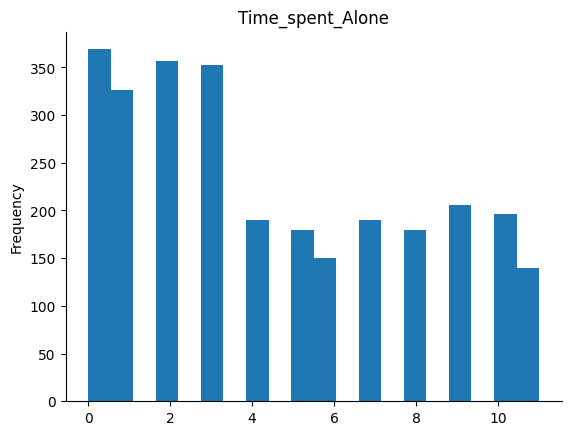

In [7]:
# @title Time_spent_Alone

from matplotlib import pyplot as plt
df['Time_spent_Alone'].plot(kind='hist', bins=20, title='Time_spent_Alone')
plt.gca().spines[['top', 'right',]].set_visible(False)

Antes de continuar é necessário tomar algumas decisões em relação aos campos nulos.

Como o dataset não é muito grande, eu quero evitar excluir as entidades. Ao invés disso eu irei preencher os valores numéricos com a média de sua coluna e os valores categóricos com a moda.

In [8]:
df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean())
df['Stage_fear'] = df['Stage_fear'].fillna(df['Stage_fear'].mode()[0])
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean())
df['Going_outside'] = df['Going_outside'].fillna(df['Going_outside'].mean())
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0])
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean())
df['Post_frequency'] = df['Post_frequency'].fillna(df['Post_frequency'].mean())
df['Personality'] = df['Personality'].fillna(df['Personality'].mode()[0])


In [9]:
df.isna().sum() # Não há mais campos nulos

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [10]:
# Label Encoding
df['Stage_fear'] = df['Stage_fear'].map({'No': 0, 'Yes': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
df['Personality'] = df['Personality'].map({'Extrovert': 1, 'Introvert': 0})

In [11]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [12]:
correlations = df.corr()['Personality'].sort_values(ascending=False)
print("Correlação dos atributos com personalidade")
print(correlations)
print("Quanto mais positivo a correção, mais extrovertida é a pessoa")

Correlação dos atributos com personalidade
Personality                  1.000000
Going_outside                0.739251
Social_event_attendance      0.721520
Post_frequency               0.721062
Friends_circle_size          0.687203
Time_spent_Alone            -0.712468
Drained_after_socializing   -0.845388
Stage_fear                  -0.847467
Name: Personality, dtype: float64
Quanto mais positivo a correção, mais extrovertida é a pessoa


Confirmando nossa intuição do gráfica anterior, ficar cansado após socialização é uma característica mais voltada para introvertidos.

In [13]:
# Hora do treinamento

X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8146 - loss: 0.4589 - val_accuracy: 0.9095 - val_loss: 0.3318
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9475 - loss: 0.2601 - val_accuracy: 0.9095 - val_loss: 0.3381
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.2757 - val_accuracy: 0.9095 - val_loss: 0.3253
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9497 - loss: 0.2355 - val_accuracy: 0.9095 - val_loss: 0.3238
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9378 - loss: 0.2644 - val_accuracy: 0.9095 - val_loss: 0.3301
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9447 - loss: 0.2358 - val_accuracy: 0.9095 - val_loss: 0.3178
Epoch 7/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9446 - loss: 0.2357 - val_accuracy: 0.9095 - val_loss: 0.3172
Epoch 8/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9395 - loss: 0.2444 - val_accuracy: 0.

In [15]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia do modelo: {accuracy:.4f}")

Acurácia do modelo: 0.9224


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


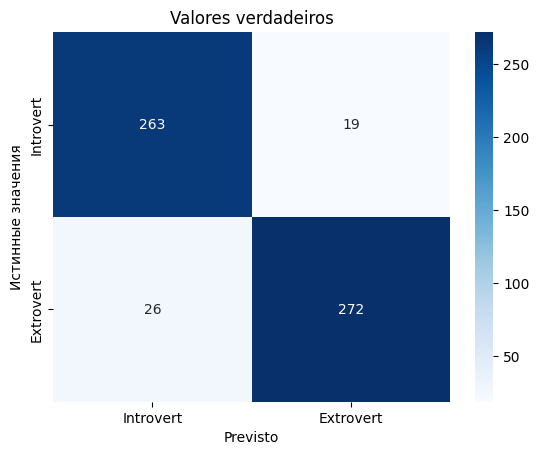

In [16]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Previsto')
plt.ylabel('Истинные значения')
plt.title('Valores verdadeiros')
plt.show()

- Introvertidos identificados corretamente: 263 de 282 (93%)
- Extrovertidos identificados corretamente: 272 de 298 (91%)
- 19 introvertidos foram classificados incorretamente como extrovertidos (7% de todos os introvertidos)
- 26 extrovertidos foram classificados incorretamente como introvertidos (9% de todos os extrovertidos)

## Conclusões

O treinamento de um modelo de rede neural usando o dataset fornecido para classificação de pessoas introvertidas e extrovertidas se tornou válido com uma acurácia de 92,22%, indicando ser um bom modelo para esse tipo de classificação.

A matriz de confusão confirma que o modelo apresenta alta precisão e desempenho equilibrado para ambas as categorias — introvertidos e extrovertidos. A maioria dos objetos foi classificada corretamente e o número de erros foi mínimo, o que indica um desempenho estável e de alta qualidade do modelo.

Apesar que foi observado que se o treinamento fosse interrompido na epoca 31, teríamos uma acurácia de 95,30%, não sei dizer se é necessário um treinamento tão longo.

## Referencias

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data
https://www.kaggle.com/code/fot66hg76/personality-classification-using-neural-networks
